# Difference in Differences

# 1. Data simulation

Data obtained from [google
trends](https://trends.google.com/trends/explore?date=2015-11-01%202016-02-01&geo=US&q=%2Fm%2F0fdv3&hl=en-US).
Google Trends are calculated based on resampling, so the data might be
slightly different every time you download it.

Reading the data

In [1]:
import pandas as pd
from rdrobust import rdrobust
import seaborn as sns
from numpy import where, arange


data = pd.read_csv("gtrends_rdd.csv")
release_day = where(data.Day == "2015-12-18")[0][0]
data["period"] = arange(data.shape[0]) - release_day

Ploting the data

<Axes: xlabel='period', ylabel='III_interest'>

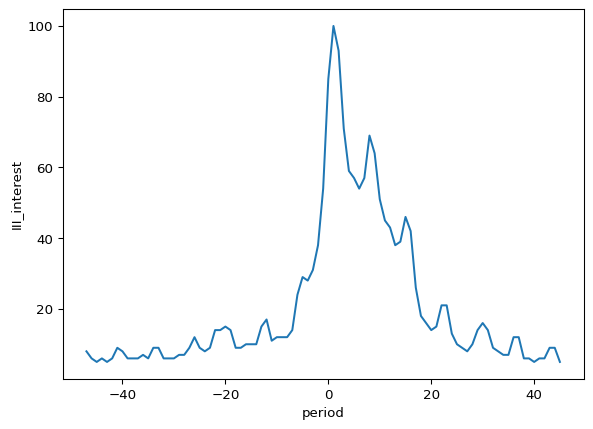

In [2]:
sns.lineplot(x="period", y="III_interest", data=data)

Applying RDD with the `rdrobust` library.

In [3]:
rdrobust(data.III_interest, data.period)

Call: rdrobust
Number of Observations:                    93
Polynomial Order Est. (p):                  1
Polynomial Order Bias (q):                  2
Kernel:                            Triangular
Bandwidth Selection:                    mserd
Var-Cov Estimator:                         NN

                                Left      Right
------------------------------------------------
Number of Observations            47         46
Number of Unique Obs.             47         46
Number of Effective Obs.          10         11
Bandwidth Estimation          10.349     10.349
Bandwidth Bias                17.321     17.321
rho (h/b)                      0.597      0.597

Method             Coef.     S.E.   t-stat    P>|t|       95% CI      
-------------------------------------------------------------------------
Conventional      40.119   12.316    3.257   1.124e-03    [15.98, 64.258]
Robust                 -        -    2.478   1.321e-02    [7.698, 65.945]

The estimated causal impact of the release is 40.11 (15.98, 64.25).